In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers.core import Dense, Dropout, Activation, Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

import sklearn
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
# creating dataset
train_data_dir = 'C:/Users/miche/homework_5/DITS-classification/DITS-classification/classification train'
test_data_dir = 'C:/Users/miche/homework_5/DITS-classification/DITS-classification/classification test'

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        zoom_range=0.2,
        shear_range=0.2,
        horizontal_flip=False,
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [4]:
batch_size = 128
test_batch_size = 1159

train_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(32, 32),
    color_mode="rgb",
    batch_size=test_batch_size,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 5992 images belonging to 59 classes.
Found 1497 images belonging to 59 classes.
Found 1159 images belonging to 59 classes.


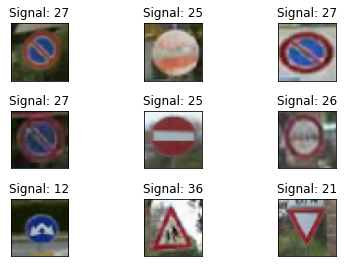

In [5]:
X_train, y_train = train_generator[0][0], train_generator[0][1]
sub_class = os.listdir(train_data_dir)
CLASS_NAMES=np.array(sub_class)

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i])
    plt.title("Signal: {}".format(CLASS_NAMES[y_train[i]==1][0]))
    plt.xticks([])
    plt.yticks([])

In [6]:
# printing the shape of each dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

(X_valid, y_valid) = next(valid_generator)
print("X_valid shape", X_valid.shape)
print("y_valid shape", y_valid.shape)

X_train shape (128, 32, 32, 3)
y_train shape (128, 59)
X_valid shape (128, 32, 32, 3)
y_valid shape (128, 59)


In [7]:
# building a linear stack of layers with the sequential model
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(59, activation='sigmoid'))

In [8]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
# training the model and saving metrics in history
history = model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = valid_generator.n//valid_generator.batch_size,
                    epochs=30)

Epoch 1/30
46/46 [==============================] - 9s 191ms/step - loss: 3.5570 - accuracy: 0.0733 - val_loss: 3.2217 - val_accuracy: 0.0874
Epoch 2/30
46/46 [==============================] - 7s 155ms/step - loss: 3.0691 - accuracy: 0.0859 - val_loss: 3.0536 - val_accuracy: 0.0438
Epoch 3/30
46/46 [==============================] - 7s 150ms/step - loss: 2.5985 - accuracy: 0.0631 - val_loss: 2.2261 - val_accuracy: 0.1066
Epoch 4/30
46/46 [==============================] - 7s 149ms/step - loss: 1.8085 - accuracy: 0.2926 - val_loss: 1.8461 - val_accuracy: 0.5237
Epoch 5/30
46/46 [==============================] - 6s 140ms/step - loss: 1.0576 - accuracy: 0.6470 - val_loss: 1.2945 - val_accuracy: 0.6202
Epoch 6/30
46/46 [==============================] - 6s 138ms/step - loss: 0.6828 - accuracy: 0.7778 - val_loss: 1.2854 - val_accuracy: 0.6676
Epoch 7/30
46/46 [==============================] - 6s 135ms/step - loss: 0.4430 - accuracy: 0.8536 - val_loss: 1.2888 - val_accuracy: 0.6954
Epoch 

In [10]:
# saving the model
save_dir = "C:/Users/miche/homework_5/results/"
model_name = 'signal_recognition.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:/Users/miche/homework_5/results/signal_recognition.h5 


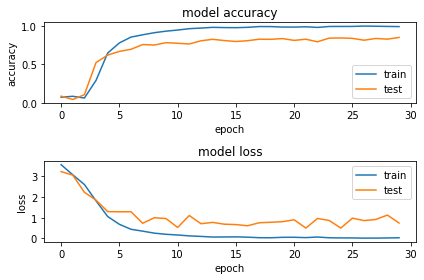

In [11]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [12]:
X_test, Y_test = test_generator[0][0], test_generator[0][1]

model = load_model("C:/Users/miche/homework_5/results/signal_recognition.h5")
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 2.590163970631294
Test Accuracy 0.6479724049568176


In [13]:
# load the model and create predictions on the test set
model = load_model("C:/Users/miche/homework_5/results/signal_recognition.h5")
predicted_classes = model.predict_classes(X_test)

y_test = np.empty(len(Y_test), dtype=int)
for j in range(len(Y_test)):
    y_test[j] = (np.where(Y_test[j]==1)[0][0])

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


751  classified correctly
408  classified incorrectly


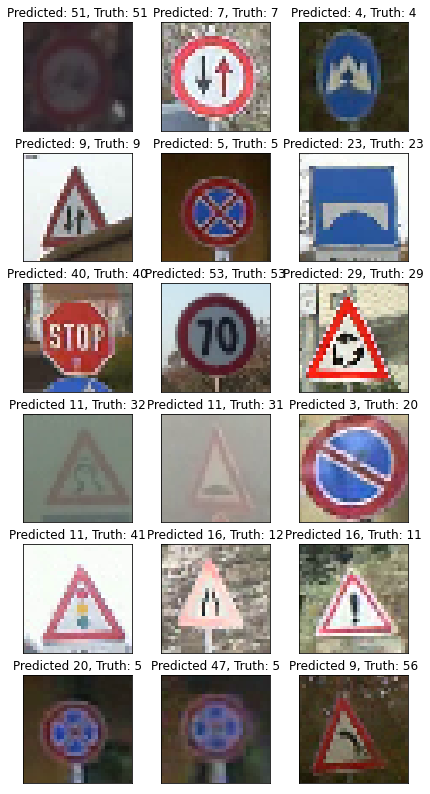

In [14]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct], interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect], interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])